In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required census dataset
cdataset = pd.read_csv('census_income.csv')
cdataset

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
cdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
cdataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [5]:
n_observations = cdataset.shape[0]
n_features = cdataset.shape[1]
inc_greater_50k = cdataset[cdataset['Income'] == ' >50K'].shape[0]
inc_less_50k = cdataset[cdataset['Income'] == ' <=50K'].shape[0]
greater_50k_percent = (inc_greater_50k/n_observations) * 100

print("Total number of observations are : {}".format(n_observations))
print("Total number of features are : {}".format(n_features))
print("Total number of individuals earning greater than 50k per year are : {}".format(inc_greater_50k))
print("Total number of individuals earning less than or equal to 50k per year are : {}".format(inc_less_50k))
print("Total percent of individuals earning greater than 50k per year are : {:.2f}%".format(greater_50k_percent))

Total number of observations are : 32560
Total number of features are : 15
Total number of individuals earning greater than 50k per year are : 7841
Total number of individuals earning less than or equal to 50k per year are : 24719
Total percent of individuals earning greater than 50k per year are : 24.08%


In [6]:
## Check for missing values in the categorical features
category_col = cdataset.select_dtypes(include = object).columns.tolist()
for col in category_col :
    print(f"----------------------------{col.title()}-------------------------------------")
    print(cdataset[col].value_counts(), '\n')

----------------------------Workclass-------------------------------------
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64 

----------------------------Education-------------------------------------
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64 

----------------------------Marital_Status-------------------------------------
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443

From the above categorical features, we can observe - 'Workclass', 'Occupation', 'Native Country' feature has missing category in the form of '?'.
Hence, we have to replace the '?' with 'others' value. Remaining categorical features seems to be fine.

In [20]:
# Changing '?' in Workclass feature to NaN value
cdataset = cdataset.replace({'?' : 'Others'})

In [23]:
cdataset.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Text(0, 0.5, 'Average Age (years)')

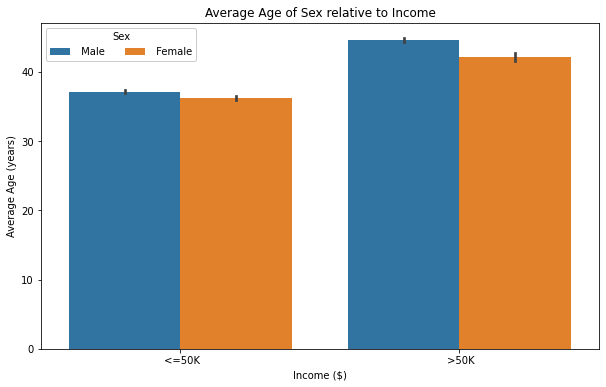

In [44]:
plt.figure(figsize=[10,6])
ax = sns.barplot(x = 'Income', y = 'Age', hue = 'Sex', data = cdataset)
ax.legend(loc = 0, ncol = 3, framealpha = 1, title = 'Sex')
plt.title('Average Age of Sex relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average Age (years)')

Average age of individual earning more than 50K is higher than the average of individuals earning less than 50K

Text(0, 0.5, 'Number of individuals')

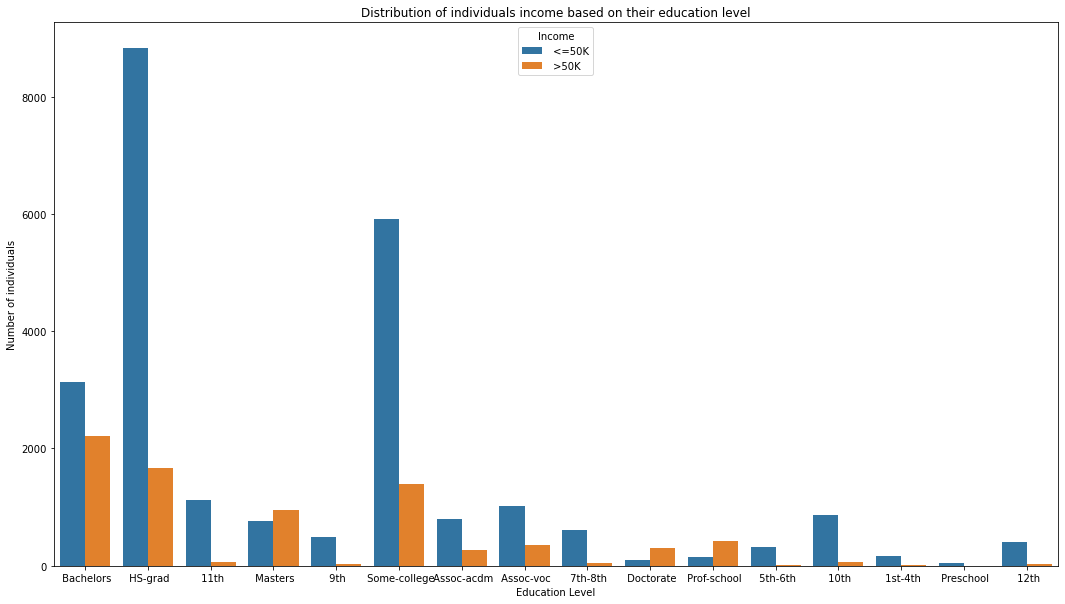

In [50]:
plt.figure(figsize=(18,10))
sns.countplot('Education', hue='Income', data = cdataset)
plt.title('Distribution of individuals income based on their education level')
plt.xlabel('Education Level')
plt.ylabel('Number of individuals')

- Majority of individuals having Bahelors tend to have highest average income more than 50K
- While Majority of individuals who have attended the some college have average income less than 50K

Text(0, 0.5, 'Number of individuals')

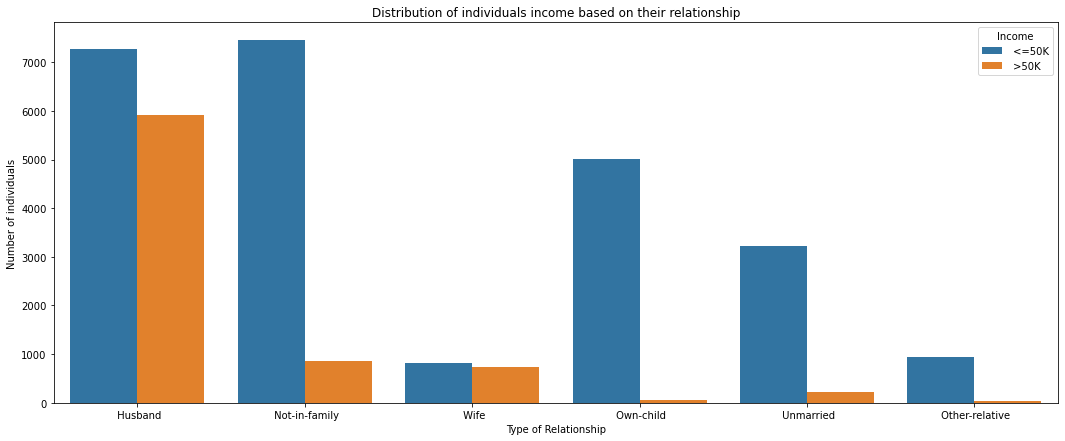

In [52]:
plt.figure(figsize=(18,7))

sns.countplot('Relationship', hue = 'Income', data = cdataset)
plt.title('Distribution of individuals income based on their relationship')
plt.xlabel('Type of Relationship')
plt.ylabel('Number of individuals')

From the above plot, we can infer :
- Individuals who doesn't have a family - level of income is not factor for them
- While individual on whom there are some dependent ones, they tends to consist their level of income

Text(0, 0.5, 'Number of individuals')

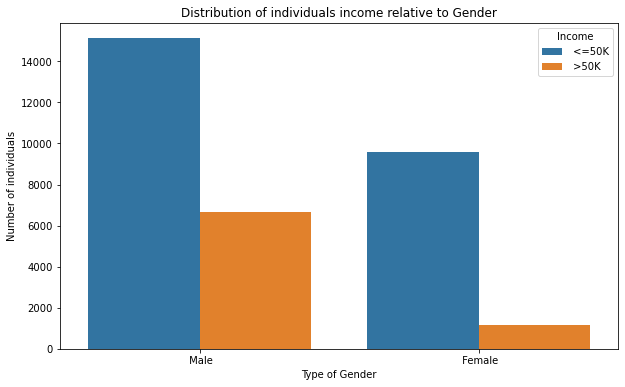

In [56]:
plt.figure(figsize=(10,6))
sns.countplot('Sex', hue = 'Income', data = cdataset)
plt.title('Distribution of individuals income relative to Gender')
plt.xlabel('Type of Gender')
plt.ylabel('Number of individuals')

Average number of individuals in 'Male' Gender are more than 'Female' Gender in both the income group

Text(0, 0.5, 'Number of individuals')

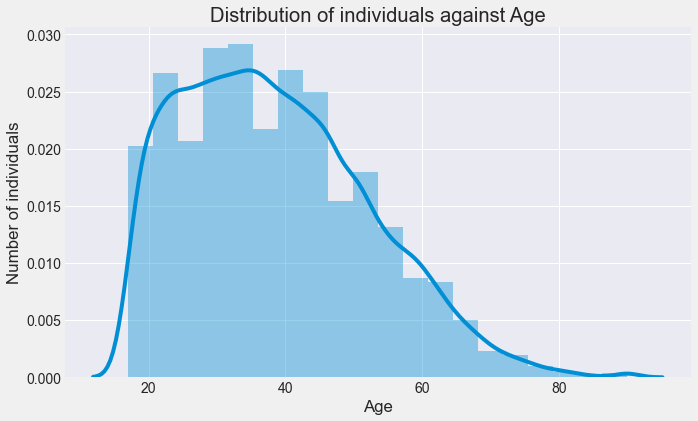

In [66]:
Age = cdataset['Age'].value_counts()

plt.figure(figsize=(10, 6))
plt.style.use('seaborn-darkgrid')
sns.distplot(cdataset['Age'], bins=20)
plt.title('Distribution of individuals against Age')
plt.xlabel('Age')
plt.ylabel('Number of individuals')

- The above distribution seems to right-skewed
- Majority of the age falls between 20 - 65 years

Text(0, 0.5, 'Number of individuals')

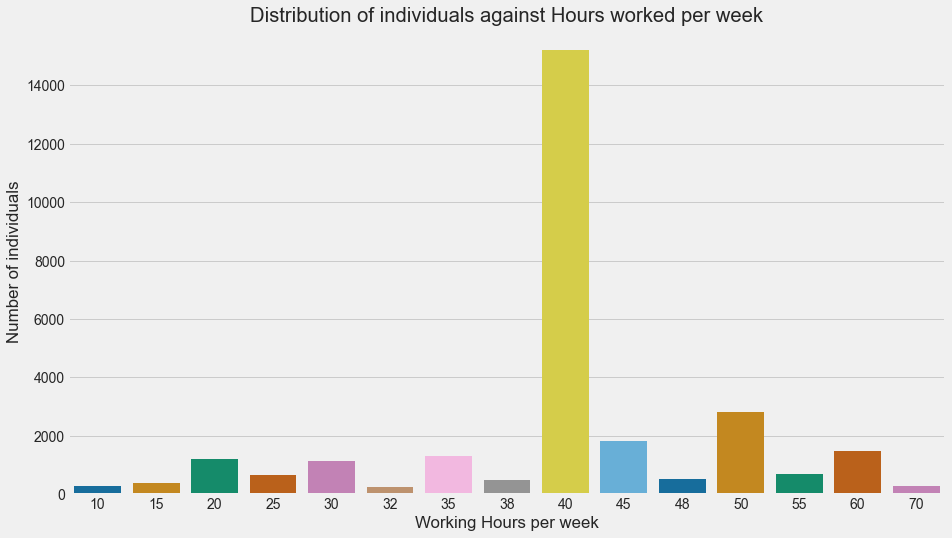

In [68]:
Hours = cdataset['Hours_per_week'].value_counts().head(15)

plt.figure(figsize=(14, 8))
plt.style.use('fivethirtyeight')
sns.barplot(Hours.index, Hours.values, palette='colorblind')
plt.title('Distribution of individuals against Hours worked per week')
plt.xlabel('Working Hours per week')
plt.ylabel('Number of individuals')

Majority of the individuals had to work for **40 hours** on an average per week

<AxesSubplot:>

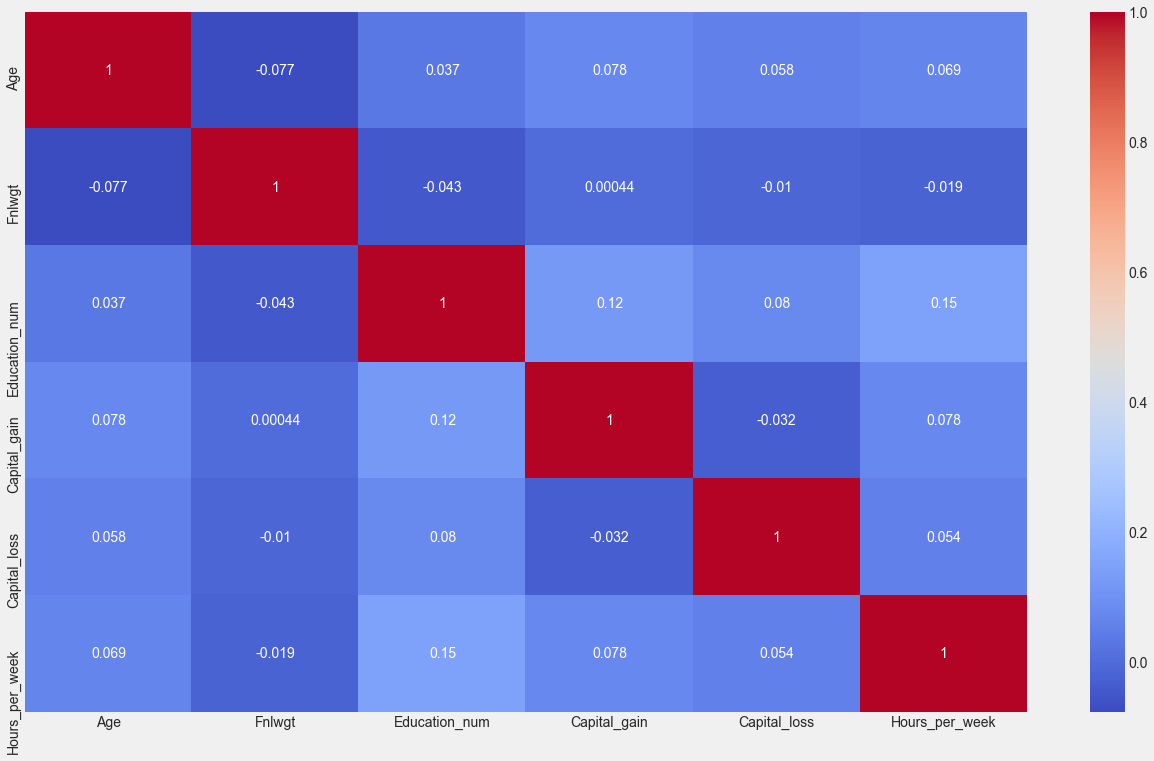

In [75]:
correlation = cdataset.corr()
plt.figure(figsize = (20,12))
sns.heatmap(correlation, cmap='coolwarm', annot=True)

In [96]:
cdataset_2 = pd.get_dummies(cdataset_1, columns = ["Workclass", "Education", "Marital_status", "Occupation"], drop_first = True)
cdataset_2

,Age,Fnlwgt,Education_num,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,...,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving
0,50,83311,13,Husband,White,Male,0,0,13,United-States,...,0,0,0,0,0,0,0,0,0,0
1,38,215646,9,Not-in-family,White,Male,0,0,40,United-States,...,0,1,0,0,0,0,0,0,0,0
2,53,234721,7,Husband,Black,Male,0,0,40,United-States,...,0,1,0,0,0,0,0,0,0,0
3,28,338409,13,Wife,Black,Female,0,0,40,Cuba,...,0,0,0,0,0,1,0,0,0,0
4,37,284582,14,Wife,White,Female,0,0,40,United-States,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,Wife,White,Female,0,0,38,United-States,...,0,0,0,0,0,0,0,0,1,0
32556,40,154374,9,Husband,White,Male,0,0,40,United-States,...,0,0,1,0,0,0,0,0,0,0
32557,58,151910,9,Unmarried,White,Female,0,0,40,United-States,...,0,0,0,0,0,0,0,0,0,0
32558,22,201490,9,Own-child,White,Male,0,0,20,United-States,...,0,0,0,0,0,0,0,0,0,0


In [97]:
cdataset_2 = cdataset_2.drop(columns = ["Education_num", "Relationship", "Race", "Native_country", "Sex"])

In [98]:
## Preparing the features and target variable
X = cdataset_2.drop(['Income'], axis = 1)
y = cdataset_2['Income']

In [101]:
X = (X - X.min())/(X.max() - X.min())

In [103]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
X = selector.fit_transform(X)
X.shape

(32560, 48)

In [104]:
# Performing PCA Analysis

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X_std = StandardScaler().fit_transform(X)
pca = PCA(n_components = 10)

In [105]:
p_comp = pca.fit_transform(X_std)
p_data = pd.DataFrame(data = p_comp)
p_data

,0,1,2,3,4,5,6,7,8,9
0,2.406753,0.380206,0.203505,2.068920,0.422700,0.710488,-0.106188,1.224957,0.897839,-0.478925
1,-1.223960,-1.265139,0.041583,-1.152914,-0.551617,-0.540984,0.549025,0.744009,-0.525819,1.455199
2,-0.474567,-1.206356,-0.567924,-0.684582,-0.451791,0.801730,-1.935980,0.781226,-0.093049,2.035606
3,0.848346,1.120764,-1.961178,-1.173253,0.160925,-0.273645,-0.323828,-0.200036,0.935955,-0.001218
4,1.386714,0.370523,-1.535658,-0.638070,0.590485,-0.099704,-1.120579,0.725429,-1.368015,0.627463
...,...,...,...,...,...,...,...,...,...,...
32555,-0.234544,-0.109893,-1.157066,0.002592,0.695237,-0.524132,-1.054593,-2.930316,2.696463,-0.091739
32556,-0.054432,-2.252910,-0.522164,-1.262713,0.275450,-0.729392,0.996941,0.220767,-0.056609,0.054671
32557,-0.300683,-1.272435,2.479125,-1.321243,2.586382,1.589941,2.763621,-0.694482,0.358571,-0.954171
32558,-2.706752,0.329355,0.813709,-0.068794,0.346327,-1.173889,1.812342,-0.406701,0.196356,-0.092865


In [106]:
## Splitting the dataset into training and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(p_data, y, test_size = 0.3 )

In [110]:
# Performing Logistic Regression

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predict_lr = log_reg.predict(X_test)

In [124]:
from sklearn import metrics
lr_acc_sr = print('Accuracy Score for Logistics Regression is : {:.2f}%'.format(metrics.accuracy_score(y_test, predict_lr) * 100))
lr_acc_sr

Accuracy Score for Logistics Regression is : 82.69%


In [115]:
# Using KNN Classifier Model

from sklearn.neighbors import KNeighborsClassifier

knn = neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

In [121]:
knn_acc_sr = print('Accuracy Score for KNN Classifier is : {:.2f}%'.format(metrics.accuracy_score(y_test, pred_knn) * 100))
knn_acc_sr

Accuracy Score for KNN Classifier is : 81.77%


In [126]:
## Using RandomForest Classifier

from sklearn.ensemble import RandomForestClassifier

randomforest_class = RandomForestClassifier(n_estimators = 100, bootstrap=False)
randomforest_class.fit(X_train, y_train)
predict_rfc = randomforest_class.predict(X_test)

In [128]:
rfc_acc_sr = print('Accuracy Score for RandomForest Classifier is : {:.2f}%'.format(metrics.accuracy_score(y_test, predict_rfc) * 100))
rfc_acc_sr

Accuracy Score for RandomForest Classifier is : 82.12%


In [131]:
# Using Decision Tree technique

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
dt_classifier = DecisionTreeClassifier() 
dt_classifier.fit(X_train, y_train)
predict_dtc = dt_classifier.predict(X_test)

In [132]:
dtc_acc_sr = print('Accuracy Score for DecisionTree Classifier is : {:.2f}%'.format(metrics.accuracy_score(y_test, predict_dtc) * 100))
dtc_acc_sr

Accuracy Score for DecisionTree Classifier is : 77.38%


In [135]:
# Using SVM Model

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
predict_svc = svc.predict(X_test)

In [136]:
svc_acc_sr = print('Accuracy Score for SupportVector Classifier is : {:.2f}%'.format(metrics.accuracy_score(y_test, predict_svc) * 100))
svc_acc_sr

Accuracy Score for SupportVector Classifier is : 83.02%


In [137]:
# Using Bagging Classifier :

from sklearn.ensemble import BaggingClassifier
bag_classifier = BaggingClassifier(max_samples=0.5,max_features=0.5)
bag_classifier.fit(X_train,y_train)
predict_bclass = bag_classifier.predict(X_test)

In [138]:
bclass_acc_sr = print('Accuracy Score for SupportVector Classifier is : {:.2f}%'.format(metrics.accuracy_score(y_test, predict_bclass) * 100))
bclass_acc_sr

Accuracy Score for SupportVector Classifier is : 81.67%


### From all the above models, we have obtained highest accuracy score for SVM Model